In this notebook, I will test the "robustness" of the following two (random-walk-based) network distances, as implemented in distances.py:

- Distance1: the distance function from this paper https://hal.inria.fr/hal-01944246/document (equations (10) and (17)).

- Distance2: the dissimilarity function from the paper "A Family of Dissimilarity Measures between Nodes Generalizing both the Shortest-Path and the Commute-time Distances" by Luh Yen, Marco Saerens et al.

Random walk distances should deliver accurate measurements even on noisy networks, i.e. networks with missing edges or with too many edges. Therefore, to test whether this is the case with the two distances above, I will do the following.

On a random network, I will: 1) compute the pairwise distances, 2) add/remove a random number of edges, 3) compute the pairwise distances on the modified network. Then I will plot the original distances vs. the distances on the modified network and calculate the correlation coefficient. Ideally, the correlation coefficient should be high. Furthermore, the more edges are changed, the lower it should get. 

In [1]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
import distances
import linalg_tools as lt
import network_tools as nt

Create random graph

In [13]:
n = 50
theta = 4
large_number = 100
G = nx.erdos_renyi_graph(n, 0.2)

In [4]:
nx.number_connected_components(G)

1

### Distance1

In [11]:
def get_distance_matrix_1(G):
    n = G.number_of_nodes()
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(i):
            M[i, j] = distances.expected_rw_distance(G, i, j)
    M_prime = M+np.transpose(M)
    return M_prime-np.diag(M_prime)

The following cells take very long to compute :( My implementation of Distance1 is quite bad

In [9]:
import time

In [12]:
start = time.time()
D = get_distance_matrix_1(G)
end = time.time()
print(f'elapsed time for calculating distance matrix: {end-start}')

elapsed time for calculating distance matrix: 1876.944499015808


I have not run the following cells yet, because calculating the distance matrix for distance 1 takes very long (see cell above)

In [ ]:
iterations = 5
matrices = []
for i in range(iterations):
    print('---------------')
    print(f'iteration: {i}')
    
    num_edges = random.randrange(25, 30)
    edges_to_remove = []
    edges_to_add = []
    for j in range(num_edges):
        u = random.randrange(0, n)
        v = random.randrange(0, n)
        if G.has_edge(u, v):
            edges_to_remove.append((u, v))
        else:
            edges_to_add.append((u, v))
    print(f'number of edges to remove: {len(edges_to_remove)}')
    print(f'number of edges to add: {len(edges_to_add)}')
    
    G.remove_edges_from(edges_to_remove)
    G.add_edges_from(edges_to_add)
    matrices.append(get_distance_matrix_1(G, theta, large_number))
    print(f'number of connected components after modifying edges: {nx.number_connected_components(G)}')
    G.add_edges_from(edges_to_remove)
    G.remove_edges_from(edges_to_add)

In [ ]:
i = 0
x = D.reshape((1, n**2))
for matrix in matrices:
    print(f'iteration: {i}')
    
    fig = plt.figure(figsize=(8, 6))
    y = matrix.reshape((1, n**2))
    plt.scatter(x, y, s=10)
    print(f'correlation coefficient: {np.corrcoef(x, y)[0, 1]}')
    
    x1 = list(range(int(np.ceil(max(x[0])))))
    plt.plot(x1, x1, 'r')
    
    plt.xlabel("Distances on original graph")
    plt.ylabel("Distances on graph with modified edges")
    plt.show()
    
    i += 1

### Distance2

In [5]:
def get_distance_matrix_2(G, theta, large_number):
    n = G.number_of_nodes()
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(i):
            M[i, j] = distances.diss_distance(i, j, theta, G, large_number)
    M_prime = M+np.transpose(M)
    return M_prime-np.diag(M_prime)

In [17]:
start = time.time()
D = get_distance_matrix_2(G, theta, large_number)
end = time.time()
print(f'elapsed time for calculating distance matrix: {end-start}')

elapsed time for calculating distance matrix: 7.245605945587158


In [9]:
iterations = 10
matrices = []
for i in range(iterations):
    print('---------------')
    print(f'iteration: {i}')
    
    num_edges = random.randrange(25, 30)
    edges_to_remove = []
    edges_to_add = []
    for j in range(num_edges):
        u = random.randrange(0, n)
        v = random.randrange(0, n)
        if G.has_edge(u, v):
            edges_to_remove.append((u, v))
        else:
            edges_to_add.append((u, v))
    print(f'number of edges to remove: {len(edges_to_remove)}')
    print(f'number of edges to add: {len(edges_to_add)}')
    
    G.remove_edges_from(edges_to_remove)
    G.add_edges_from(edges_to_add)
    matrices.append(get_distance_matrix_2(G, theta, large_number))
    print(f'number of connected components after modifying edges: {nx.number_connected_components(G)}')
    G.add_edges_from(edges_to_remove)
    G.remove_edges_from(edges_to_add)

---------------
iteration: 0
number of edges to remove: 5
number of edges to add: 22
number of connected components after modifying edges: 1
---------------
iteration: 1
number of edges to remove: 8
number of edges to add: 17
number of connected components after modifying edges: 1
---------------
iteration: 2
number of edges to remove: 8
number of edges to add: 20
number of connected components after modifying edges: 1
---------------
iteration: 3
number of edges to remove: 5
number of edges to add: 21
number of connected components after modifying edges: 1
---------------
iteration: 4
number of edges to remove: 10
number of edges to add: 19
number of connected components after modifying edges: 1
---------------
iteration: 5
number of edges to remove: 7
number of edges to add: 20
number of connected components after modifying edges: 1
---------------
iteration: 6
number of edges to remove: 4
number of edges to add: 25
number of connected components after modifying edges: 1
------------

iteration: 0
correlation coefficient: 0.9384555396466556


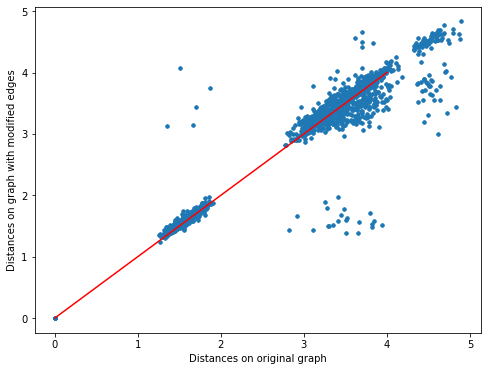

iteration: 1
correlation coefficient: 0.9374458998842443


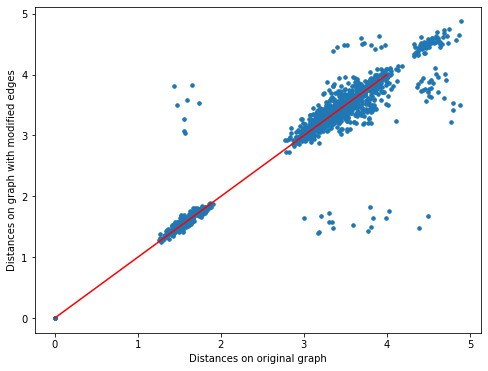

iteration: 2
correlation coefficient: 0.9384084459033095


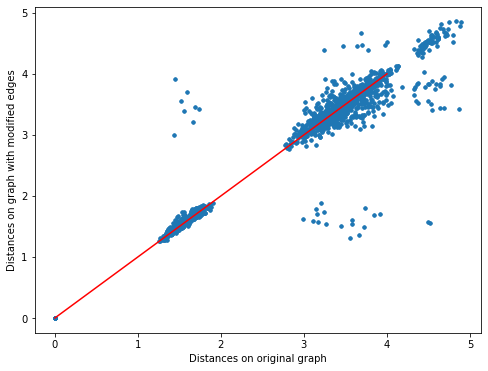

iteration: 3
correlation coefficient: 0.9426162467862734


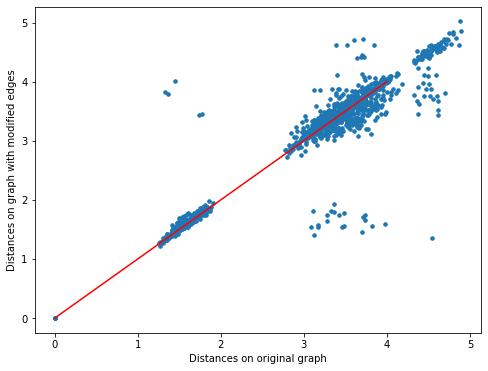

iteration: 4
correlation coefficient: 0.9270815334138605


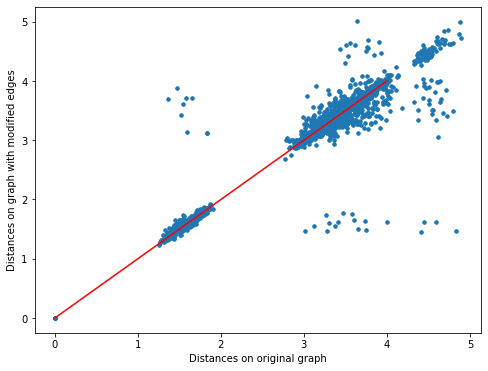

iteration: 5
correlation coefficient: 0.9329606889272309


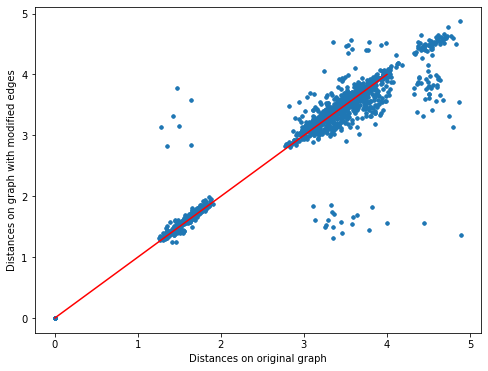

iteration: 6
correlation coefficient: 0.9232170434765714


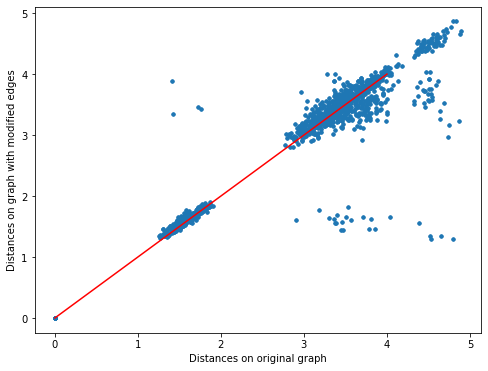

iteration: 7
correlation coefficient: 0.9346469173113632


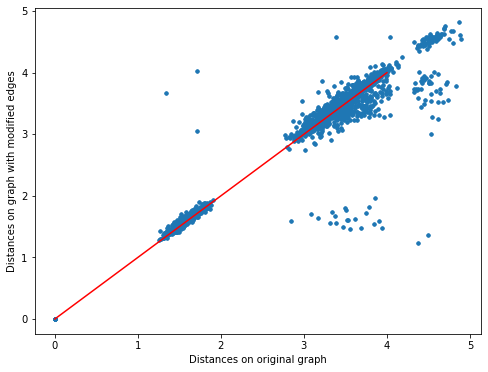

iteration: 8
correlation coefficient: 0.9423505042445267


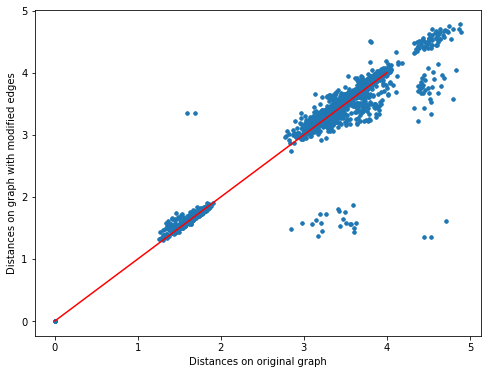

iteration: 9
correlation coefficient: 0.9535651881295871


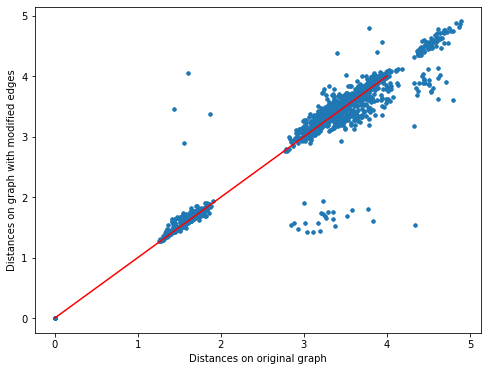

In [10]:
i = 0
x = D.reshape((1, n**2))
for matrix in matrices:
    print(f'iteration: {i}')
    
    fig = plt.figure(figsize=(8, 6))
    y = matrix.reshape((1, n**2))
    plt.scatter(x, y, s=10)
    print(f'correlation coefficient: {np.corrcoef(x, y)[0, 1]}')
    
    x1 = list(range(int(np.ceil(max(x[0])))))
    plt.plot(x1, x1, 'r')
    
    plt.xlabel("Distances on original graph")
    plt.ylabel("Distances on graph with modified edges")
    plt.show()
    
    i += 1

In [18]:
iterations = 10
n_e = [5, 15, 25, 35, 45]
med_cc = []
for number in n_e:
    matrices = []
    for i in range(iterations):

        num_edges = random.randrange(number, number+5)
        edges_to_remove = []
        edges_to_add = []
        for j in range(num_edges):
            u = random.randrange(0, n)
            v = random.randrange(0, n)
            if G.has_edge(u, v):
                edges_to_remove.append((u, v))
            else:
                edges_to_add.append((u, v))

        G.remove_edges_from(edges_to_remove)
        G.add_edges_from(edges_to_add)
        matrices.append(get_distance_matrix_2(G, theta, large_number))
        G.add_edges_from(edges_to_remove)
        G.remove_edges_from(edges_to_add)
        
    x = D.reshape((1, n**2))
    corr_coeffs = []
    for matrix in matrices:
        y = matrix.reshape((1, n**2))
        corrcoef = np.corrcoef(x, y)[0, 1]
        corr_coeffs.append(corrcoef)
    med_cc.append(np.mean(np.array(corr_coeffs)))

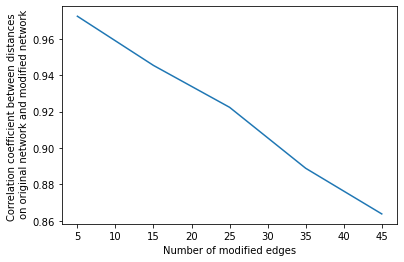

In [21]:
plt.xlabel("Number of modified edges")
plt.ylabel("Correlation coefficient between distances \n on original network and modified network")
plt.plot(n_e, med_cc)
plt.show()